<a href="https://colab.research.google.com/github/hache22/EDA_IBM/blob/main/EDA_Empleados_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Exploratorio de datos: Satisfaccion de los Empleados de IBM

### *El presente documento pretende entender los factores que hacen perder empleados y/o provocar altas tasas de insactisfaccion de los empleados de IBM con respecto a su realidad laboral en la Empresa.*

### Este análisis exploratorio proporciona una base sólida para futuras investigaciones y la toma de decisiones estratégicas. Al comprender mejor los factores que impulsan la satisfacción y la retención de los empleados, IBM puede crear un entorno laboral más atractivo y productivo.

# [Fuente de los Datos](https://www.kaggle.com/datasets/rohitsahoo/employee)

In [28]:
# Carga de Libreria pandas para el analisis de los datos
import pandas as pd

# Carga del Dataset
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Mostrando las Primeras lineas del set de datos
print(data.head(10))

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8      

### El conjunto de datos se cargo con éxito, y las primeras filas se muestran a continuación para proporcionar una visión general de su estructura y contenido.


## Se procede a calcular estadísticas descriptivas para evaluar la estructura de los datos e identificar cualquier necesidad potencial de limpieza.


In [ ]:
estadisticas = data.describe(include='all')

# Mostrando las Estadisticas descriptivas del set de datos
print(estadisticas)

                Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top     Research & Developm

***Observaciones clave del set de datos:***
1. El conjunto de datos contiene 1.470 empleados
2. Las edades varían de 18 a mediados de los años 60 con una media de aproximadamente 37 años
3. Los ingresos mensuales varían de 1.009usd a más de 6.500usd en promedio
4. Todos los campos numéricos tienen datos completos (no faltan valores)
5. Las variables categóricas destacadas: Departamento(Departament), Genero(Gender) y Estado Civil(MaritalStatus)
6.  Las horas de trabajo estándar son consistentes a las 80 horas
7.  Las métricas de experiencia (YearsAtCompany, TotalWorkingYears, etc.) muestran una buena variación
8.  Los datos parecen estar limpios y bien estructurados sin valores faltantes o anomalías obvias que requerirían limpieza.


# Visualizacion

## Los datos estan limpios para poder ser visualizados de manera eficaz. Todos los tipos de datos son apropiados para sus columnas Los rangos y distribuciones parecen razonables, no hay valores atípicos obvios que necesiten ser abordados.

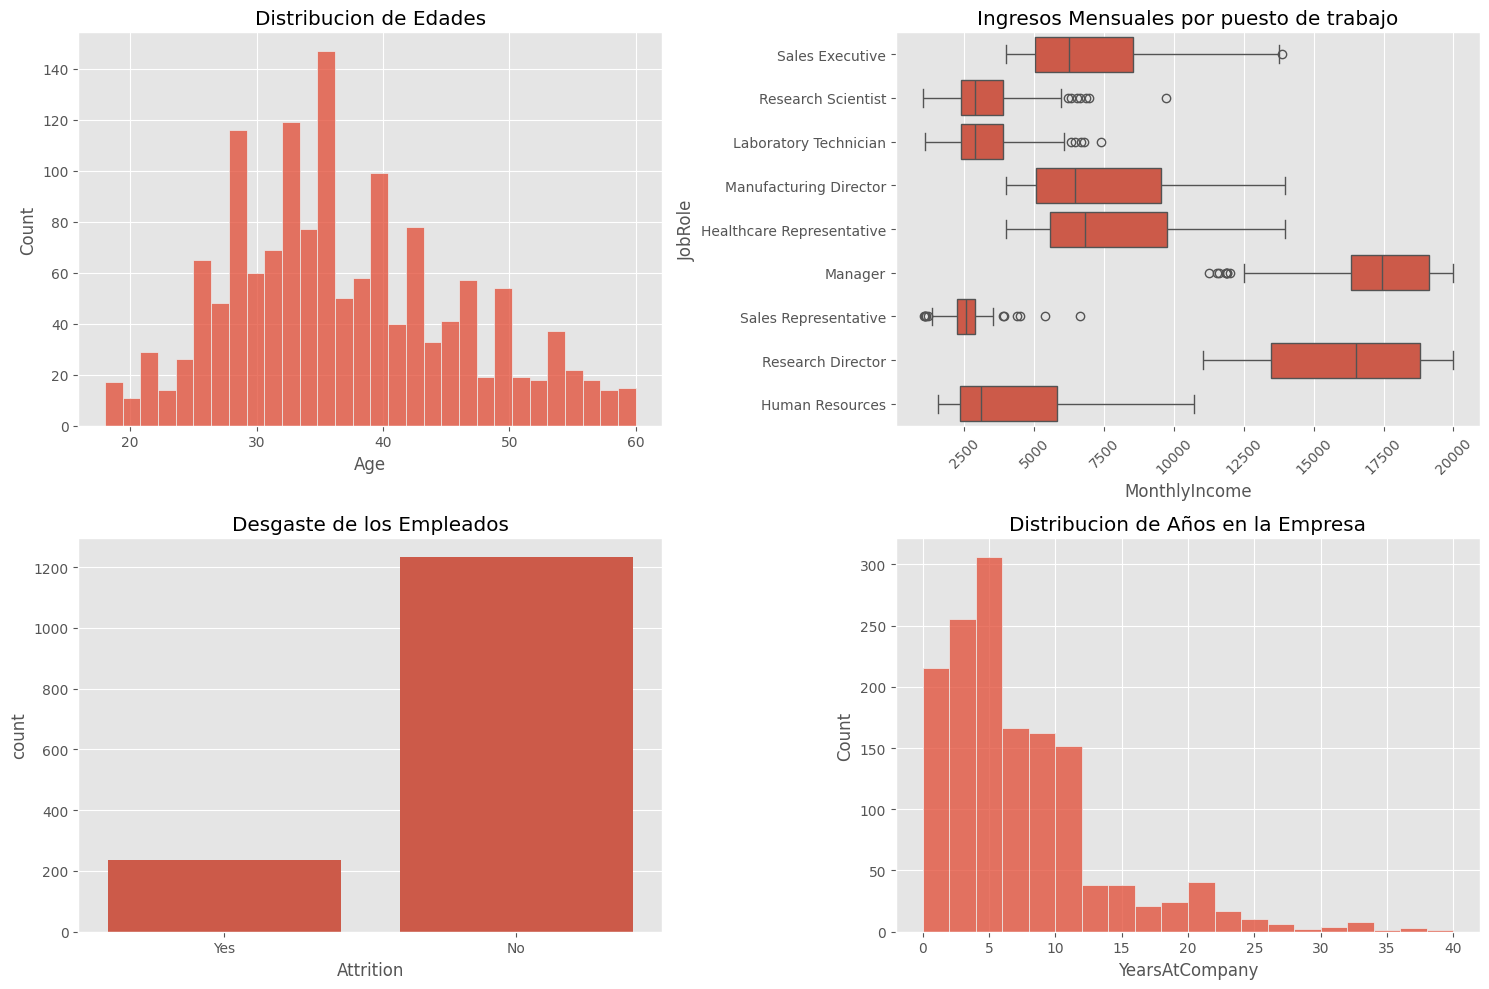

In [ ]:
# Importacion de Librerias para visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando estilo
plt.style.use('ggplot')

# Creacion de figura con subplots
fig = plt.figure(figsize=(15, 10))

# Gráfico 1: Distribucion de Edades
plt.subplot(2, 2, 1)
sns.histplot(data=data, x='Age',bins=30)
plt.title('Distribucion de Edades')

# Gráfico 2: Ingresos Mensuales por puestos
plt.subplot(2, 2, 2)
sns.boxplot(data=data, y='JobRole', x='MonthlyIncome')
plt.title('Ingresos Mensuales por puesto de trabajo')
plt.xticks(rotation=45)

# Gráfico 3: Distribucion del desgaste de los Empleados
plt.subplot(2, 2, 3)
sns.countplot(data=data, x='Attrition')
plt.title('Desgaste de los Empleados')

# Gráfico 4: Distribucion de Años en la Empresa
plt.subplot(2, 2, 4)
sns.histplot(data=data, x='YearsAtCompany', bins=20)
plt.title('Distribucion de Años en la Empresa')

plt.tight_layout()
plt.show()

# *Explicacion de los Graficos*
## **Gráfico 1: Distribución de Edades**
*Histograma que muestra la distribución de las edades de los empleados. El eje x representa la edad, y el eje y representa la frecuencia o el recuento de empleados dentro de cada grupo de edad. La trama revela la demografía de edad de la fuerza laboral.*
##**Gráfico 2: Ingresos Mensuales por Puesto de Trabajo**
*Gráfico de caja que ilustra la distribución mensual del ingreso para cada rol de trabajo. El eje y representa diferentes roles de trabajo, y el eje x representa el ingreso mensual. El gráfico de la caja muestra la mediana, los cuartiles y los valores atípicos potenciales para los ingresos dentro de cada rol de trabajo, destacando las variaciones de ingresos en diferentes posiciones.*
## **Gráfico 3: Atricion de los Empleados**
*Gráfico de barras que muestra el recuento de empleados que abandonaron la empresa (atrición) o se quedaron. El eje x muestra el estado de desgaste (por ejemplo, Sí/No), y el eje y representa el número de empleados en cada categoría. Esta gráfica muestra rápidamente la tasa de desgaste.*
## **Gráfico 4: Distribución de Años en la Empresa**
**Un histograma que muestra la distribución de cuánto tiempo estuvieron los empleados con la empresa.** El eje x muestra el número de años en la empresa, y el eje y el número de empleados con esa tenencia. Esto revela patrones de retención de empleados.
## **Gráfico 5: Desercion por Genero (Atrición por Género)**
Gráfico de barras que muestra el número de empleados que han abandonado la empresa (atrición) desglosado por género. Esta trama ayuda a determinar si hay una diferencia en las tasas de desgaste entre los géneros.
## **Gráfico 6: Distribución de ingreso mensual de los empleados**
Histograma con una estimación de densidad del núcleo (KDE) que muestra la distribución de los ingresos mensuales para todos los empleados. El eje x representa el ingreso mensual, el eje y el número de empleados dentro de un rango de ingresos, y el KDE superpuesto proporciona una estimación suavizada de la distribución del ingreso.
## **Gráfico 7: Satisfaccion de los empleados por departamento**
Gráficos de caja que muestran los niveles de satisfacción laboral para diferentes departamentos. El eje x representa el departamento y el eje y representa la satisfacción laboral. Los diagramas de caja permiten la visualización de la satisfacción media y la propagación, lo que indica posibles diferencias en la satisfacción en diferentes departamentos.
## **Gráfico 8: Total de Años de Trabajo vs. Ingresos Mensuales**
Diagrama de dispersión que muestra la relación entre el total de años de trabajo y los ingresos mensuales. Cada punto representa a un empleado, coloreado según si ha abandonado la empresa.
**Esto permite la visualización de correlaciones potenciales entre estas variables y la influencia del desgaste.**

## Verificando la Calidad de los Datos

In [27]:
# Chequeando datos faltantes
print(f"""Visualizacion de los datos faltantes del set de Datos:
          {data.isnull().sum()}""")

# Busqueda de Datos duplicados
print(f"Numero de filas duplicadas dentro del set de Datos: {data.duplicated().sum()}")

# Verificando valores unicos dentro de las columnas
categorical_cols = data.select_dtypes(include=['object']).columns
print("Valores unicos dentro de las filas categoricas:")
for col in categorical_cols:
    print(f"\
{col}:", data[col].unique())

/ Visualizacion de los datos faltantes del set de Datos:
          Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
Yea

# Generando nuevas visualizaciones posterior a la validacion de la calidad de los datos

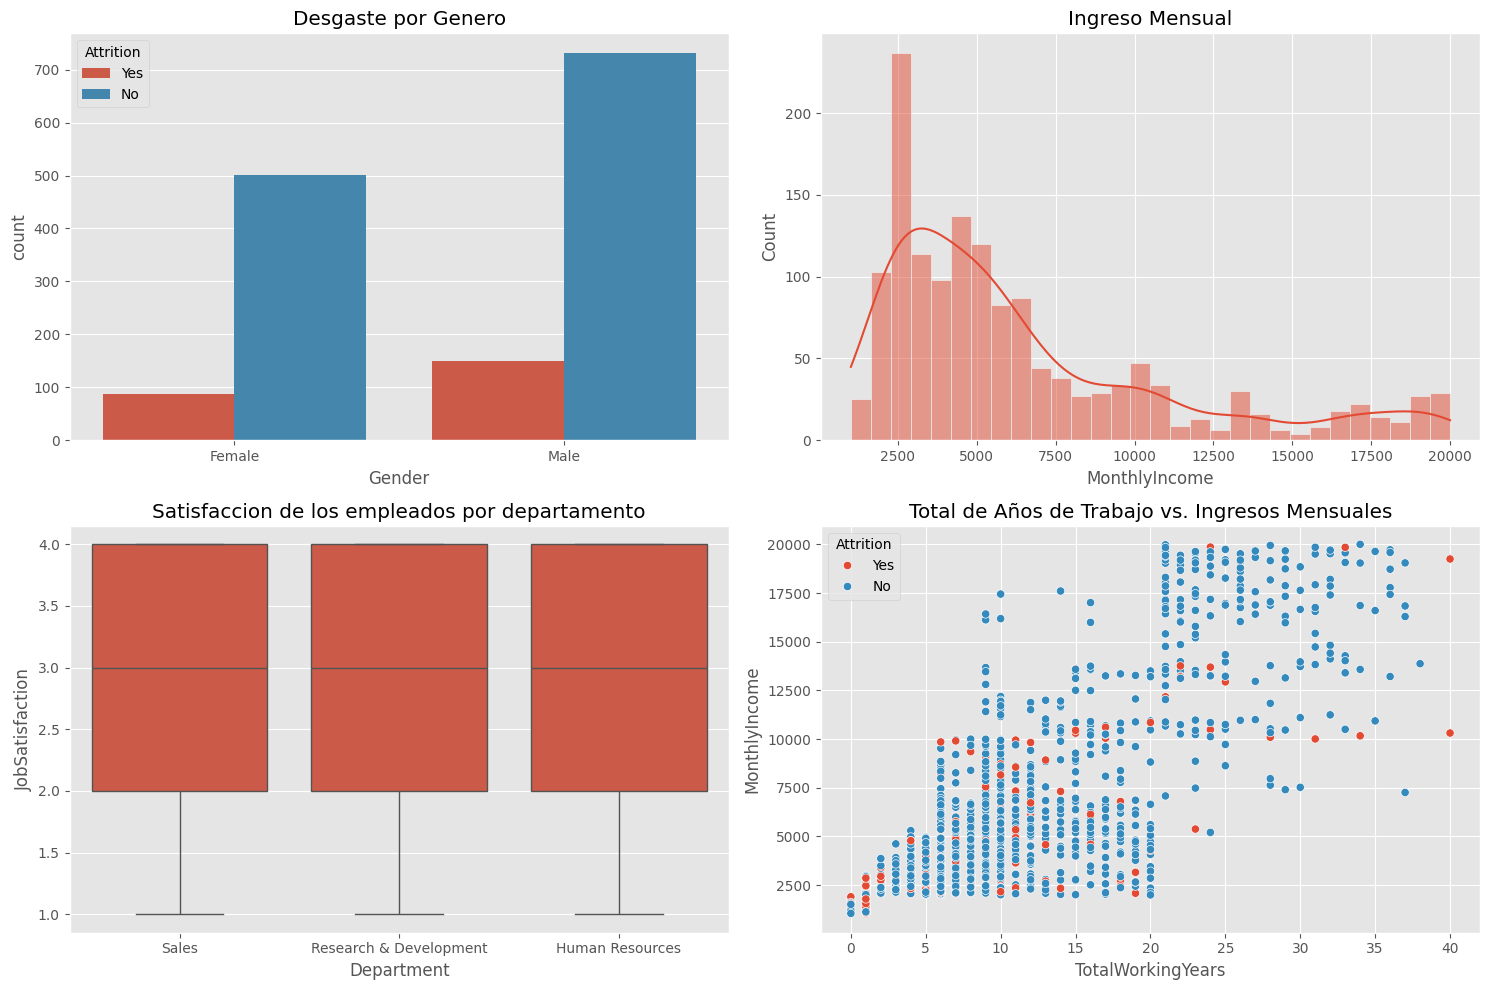

In [ ]:
# Eligiendo tamaño de las figuras
fig = plt.figure(figsize=(15, 10))

# Figura 1: Desgaste por Genero
plt.subplot(2, 2, 1)
sns.countplot(data=data, x='Gender', hue='Attrition')
plt.title('Desgaste por Genero')

# Figura 2: Distribucion de ingreso mensual de los empleados
plt.subplot(2, 2, 2)
sns.histplot(data=data, x='MonthlyIncome', bins=30, kde=True)
plt.title('Ingreso Mensual')

# Figura 3: Satisfaccion de los empleados por departamento
plt.subplot(2, 2, 3)
sns.boxplot(data=data, x='Department', y='JobSatisfaction')
plt.title('Satisfaccion de los empleados por departamento')

# Figura 4: Total de Años de Trabajo vs. Ingresos Mensuales
plt.subplot(2, 2, 4)
sns.scatterplot(data=data, x='TotalWorkingYears', y='MonthlyIncome', hue='Attrition')
plt.title('Total de Años de Trabajo vs. Ingresos Mensuales')

plt.tight_layout()
plt.show()

# Explicacion de los Graficos anteriores

# **Gráfico 1: Deserción por Género (Atrición por Género)**
Muestra la cantidad de empleados que han abandonado la empresa (atrición) separados por género.  Ayuda a determinar si hay diferencias en las tasas de desgaste entre hombres y mujeres.

# **Gráfico 2: Distribución de Ingreso Mensual de los Empleados**
Histograma con una estimación de densidad del núcleo (KDE) que muestra la distribución de los ingresos mensuales de todos los empleados. El eje x representa el ingreso mensual, el eje y la cantidad de empleados dentro de cada rango de ingresos. El KDE superpuesto proporciona una mejor visualización de la distribución del ingreso.

# **Gráfico 3: Satisfacción de los Empleados por Departamento**
Gráfico de caja que muestra los niveles de satisfacción laboral para los diferentes departamentos. El eje x representa el departamento y el eje y la satisfacción laboral. Los diagramas de caja permiten visualizar la satisfacción media, los cuartiles y la dispersión, mostrando posibles diferencias de satisfacción en los diferentes departamentos.

# **Gráfico 4: Total de Años de Trabajo vs. Ingresos Mensuales**

Diagrama de dispersión que muestra la relación entre los años totales de trabajo y los ingresos mensuales. Cada punto representa a un empleado, coloreado según si ha abandonado o no la empresa (atrición). Permite visualizar posibles correlaciones entre estas variables y la influencia de la deserción.

# **Cambiando de Visión**
## Se proceden a crear graficos haciendo énfasis en la satisfacción del empleado y la progresión profesional, ya que no es solo una herramienta para medir el bienestar, sino una poderosa herramienta estratégica que impacta directamente en el rendimiento, la retención, la atracción de talento y la toma de decisiones informadas. Permite a la Empresa comprender mejor a su gente, optimizar sus procesos de gestión de talento y construir un entorno laboral más positivo y productivo.

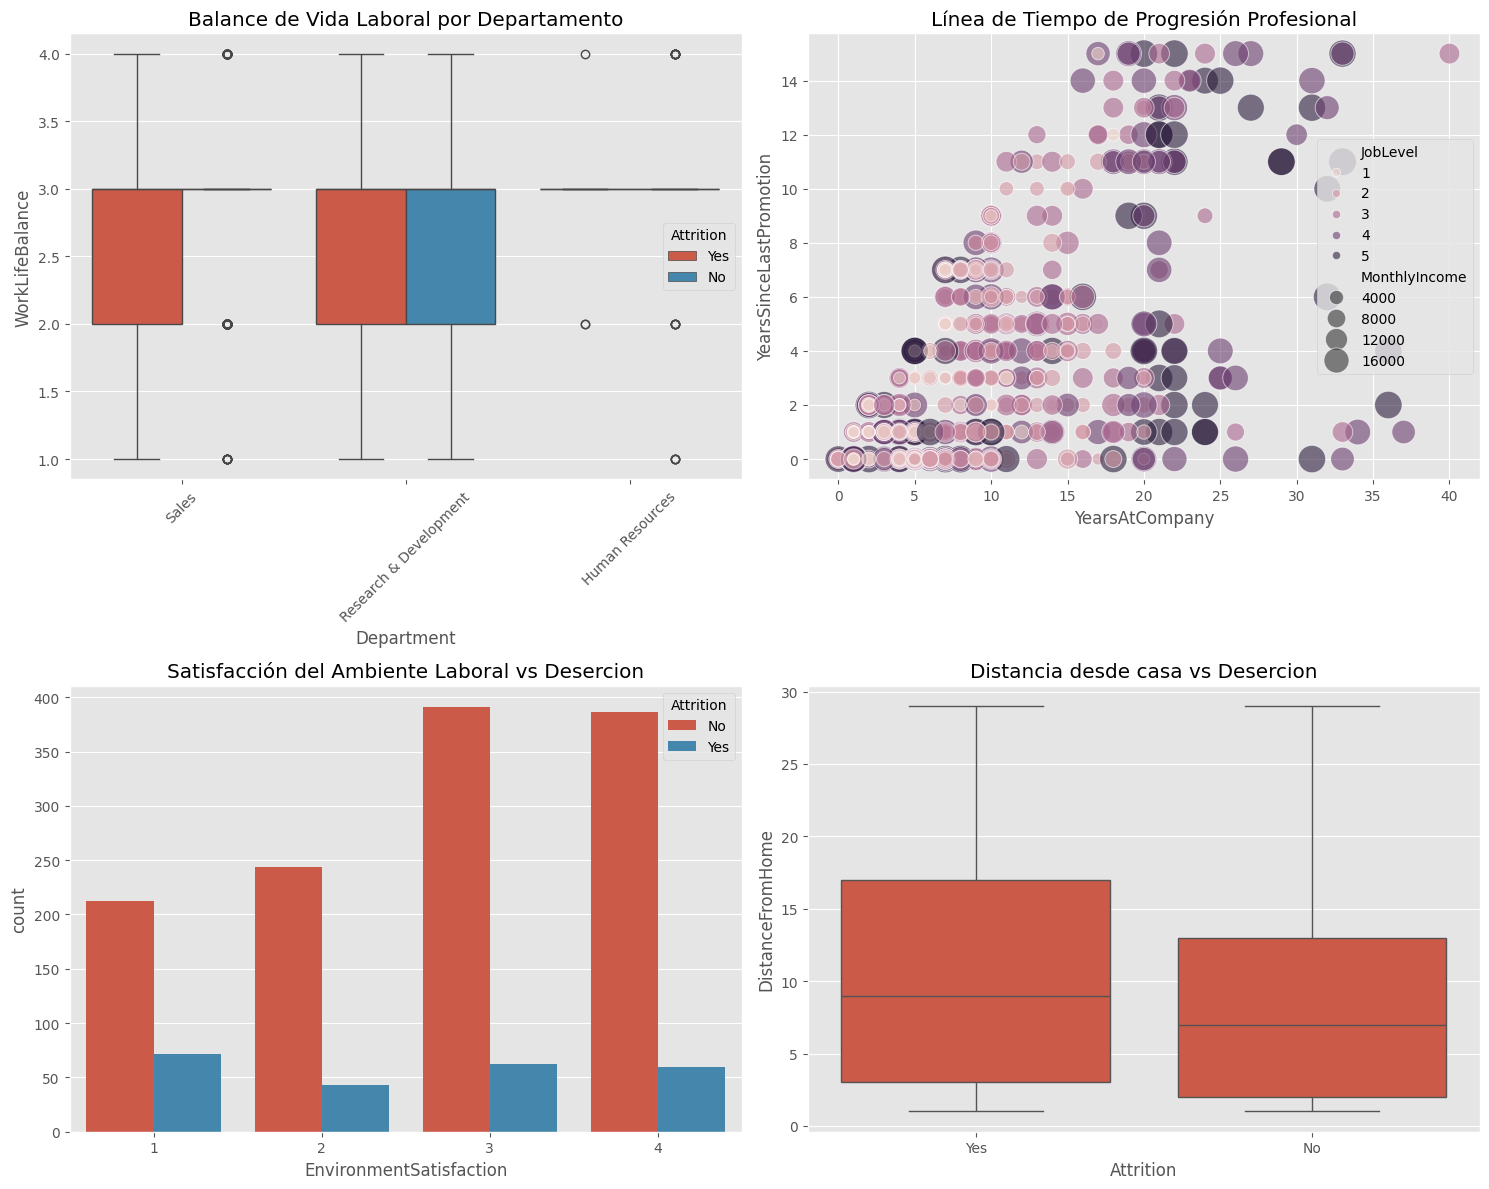

In [20]:
# eligiendo el tamaño de la figura
plt.figure(figsize=(15, 12))

# Grafico 1: Balance de Vida Laboral por Departamento con Desgaste
plt.subplot(2, 2, 1)
sns.boxplot(data=data, x='Department', y='WorkLifeBalance', hue='Attrition')
plt.title('Balance de Vida Laboral por Departamento')
plt.xticks(rotation=45)

# Grafico 2: Años en la empresa vs. años desde la última promoción
plt.subplot(2, 2, 2)
sns.scatterplot(data=data, x='YearsAtCompany', y='YearsSinceLastPromotion',
                hue='JobLevel', size='MonthlyIncome', sizes=(50, 400), alpha=0.6)
plt.title('Línea de Tiempo de Progresión Profesional')

# Grafico 3: Distribución de Satisfacción del ambiente laboral
plt.subplot(2, 2, 3)
sns.countplot(data=data, x='EnvironmentSatisfaction', hue='Attrition')
plt.title('Satisfacción del Ambiente Laboral vs Desercion')

# Grafico 4:Distancia desde casa vs Desercion
plt.subplot(2, 2, 4)
sns.boxplot(data=data, x='Attrition', y='DistanceFromHome')
plt.title('Distancia desde casa vs Desercion')

plt.tight_layout()
plt.show()

# Explicacion

## **Gráfico 1: Balance de Vida Laboral por Departamento con Desgaste**

Este gráfico de caja muestra el balance de vida laboral para cada departamento, diferenciando entre empleados que se quedaron en la empresa y los que se fueron (deserción).  Permite visualizar la distribución del balance de vida laboral en cada departamento y cómo la deserción podría estar relacionada con este factor.  Se observa la mediana, los cuartiles y posibles valores atípicos. Departamentos con una mayor dispersión o medianas más bajas en el balance podrían ser áreas de preocupación.


## **Gráfico 2: Años en la empresa vs. años desde la última promoción**

Este diagrama de dispersión relaciona los años que un empleado lleva en la empresa con los años desde su última promoción.  El color del punto indica el nivel del puesto y el tamaño del punto representa el ingreso mensual.  Este gráfico permite visualizar patrones de progresión profesional y si existen empleados que llevan mucho tiempo en la empresa sin promociones o con ingresos bajos.


##**Gráfico 3: Distribución de Satisfacción del ambiente laboral**

Este gráfico de barras muestra la distribución de la satisfacción del ambiente laboral, diferenciando entre empleados que se quedaron y los que abandonaron la empresa. Permite analizar si la satisfacción del ambiente laboral influye en la deserción.


##**Gráfico 4: Distancia desde casa vs Deserción**

Este gráfico de caja compara la distancia desde casa hasta el trabajo para empleados que se quedaron y los que se fueron. Permite analizar si la distancia desde casa juega algún papel en la decisión de abandonar la empresa. Se observa la mediana, los cuartiles y posibles valores atípicos para ambos grupos.


#Conclusiones
El análisis exploratorio de datos realizado sobre el conjunto de datos de empleados de IBM reveló información valiosa sobre los factores que influyen en la satisfacción y la retención de los empleados.

# Principales hallazgos:

1. La satisfacción laboral, el balance vida-trabajo y la progresión profesional son factores clave en la retención de empleados. *Los empleados que reportan mayor satisfacción en estos aspectos tienen menor probabilidad de abandonar la empresa.*

2. *La distancia desde casa hasta el trabajo también puede ser un factor a considerar*. Aunque no se observa una **relación directa contundente**, la distancia podría influir en la decisión de algunos empleados de abandonar la empresa.

3. **El análisis por departamento y género no muestra diferencias significativas en las tasas de deserción, aunque algunos departamentos podrían tener un balance de vida-trabajo más bajo que otros**.

4. La edad y los años de experiencia no parecen ser factores determinantes en la deserción, aunque la progresión profesional (o la falta de ella) podría influir en la decisión de algunos empleados de buscar nuevas oportunidades.
Los datos están limpios y bien estructurados, lo que permitó un análisis exploratorio eficaz. **No se encontraron valores faltantes o anomalías que requirieran una limpieza exhaustiva.**

# Recomendaciones:

1. Implementar medidas para mejorar la satisfacción laboral, el balance vida-trabajo y las oportunidades de progresión profesional para todos los empleados.
2. Considerar la distancia desde casa como un factor potencial al tomar decisiones de contratación y asignación de roles.
3. Monitorear la satisfacción de los empleados por departamento y tomar medidas para abordar cualquier problema que surja en áreas específicas.
4. Fomentar una cultura de trabajo positiva y de apoyo para mejorar la retención de empleados.

